<a href="https://colab.research.google.com/github/victoriafabris/ImersaoDados/blob/main/Aula03_Desafios_Victoria_F.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# **Aula 3**

Iniciaremos aqui nesta aula o estudo da **Análise de Correlação Linear**. 

Em probabilidade e estatística, uma correlação é uma relação numérica entre duas variáveis. Esta relação não implica, necessariamente, em uma relação de causalidade. Verificar a correlação entre variáveis serve como elemento auxiliar na análise estatística. 

Presume-se que pelo menos duas observações são feitas sobre cada elemento da amostra. A amostra consistirá de pares de valores (um para cada variável), designadas por x e y (x,y). O objetivo é o estudo das relações existentes entre as variáveis x e y, e saber se as alterações sofridas por uma das variáveis são acompanhadas por alterações nas outras.

# **Importando biblioteca e dados**

In [ ]:
import pandas as pd
import seaborn as sns
import numpy as np
import matplotlib.pyplot as plt
url_dados = 'https://github.com/alura-cursos/imersaodados3/blob/main/dados/dados_experimentos.zip?raw=true'

dados = pd.read_csv(url_dados, compression = 'zip')
dados

,id,tratamento,tempo,dose,droga,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,...,c-60,c-61,c-62,c-63,c-64,c-65,c-66,c-67,c-68,c-69,c-70,c-71,c-72,c-73,c-74,c-75,c-76,c-77,c-78,c-79,c-80,c-81,c-82,c-83,c-84,c-85,c-86,c-87,c-88,c-89,c-90,c-91,c-92,c-93,c-94,c-95,c-96,c-97,c-98,c-99
0,id_000644bb2,com_droga,24,D1,b68db1d53,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,...,0.4805,0.4965,0.3680,0.8427,0.1042,0.1403,0.1758,1.2570,-0.5979,1.2250,-0.0553,0.7351,0.5810,0.9590,0.2427,0.0495,0.4141,0.8432,0.6162,-0.7318,1.2120,0.6362,-0.4427,0.1288,1.4840,0.1799,0.5367,-0.1111,-1.0120,0.6685,0.2862,0.2584,0.8076,0.5523,-0.1912,0.6584,-0.3981,0.2139,0.3801,0.4176
1,id_000779bfc,com_droga,72,D1,df89a8e5a,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,...,0.4083,0.0319,0.3905,0.7099,0.2912,0.4151,-0.2840,-0.3104,-0.6373,0.2887,-0.0765,0.2539,0.4443,0.5932,0.2031,0.7639,0.5499,-0.3322,-0.0977,0.4329,-0.2782,0.7827,0.5934,0.3402,0.1499,0.4420,0.9366,0.8193,-0.4236,0.3192,-0.4265,0.7543,0.4708,0.0230,0.2957,0.4899,0.1522,0.1241,0.6077,0.7371
2,id_000a6266a,com_droga,48,D1,18bb41b2c,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,...,-0.5477,-0.7576,-0.0444,0.1894,-0.0014,-2.3640,-0.4682,0.1210,-0.5177,-0.0604,0.1682,-0.4436,0.4963,0.1363,0.3335,0.9760,-0.0427,-0.1235,0.0959,0.0690,-0.9416,-0.7548,-0.1109,-0.6272,0.3019,0.1172,0.1093,-0.3113,0.3019,-0.0873,-0.7250,-0.6297,0.6103,0.0223,-1.3240,-0.3174,-0.6417,-0.2187,-1.4080,0.6931
3,id_0015fd391,com_droga,48,D1,8c7f86626,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,...,-2.1220,-0.3752,-2.3820,-3.7350,-2.9740,-1.4930,-1.6600,-3.1660,0.2816,-0.2990,-1.1870,-0.5044,-1.7750,-1.6120,-0.9215,-1.0810,-3.0520,-3.4470,-2.7740,-1.8460,-0.5568,-3.3960,-2.9510,-1.1550,-3.2620,-1.5390,-2.4600,-0.9417,-1.5550,0.2431,-2.0990,-0.6441,-5.6300,-1.3780,-0.8632,-1.2880,-1.6210,-0.8784,-0.3876,-0.8154
4,id_001626bd3,com_droga,72,D2,7cbed3131,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,...,-0.2274,0.3215,0.1535,-0.4640,-0.5943,0.3973,0.1500,0.5178,0.5159,0.6091,0.1813,-0.4249,0.7832,0.6529,0.5648,0.4817,0.0587,0.5303,0.6376,-0.3966,-1.4950,-0.9625,-0.0541,0.6273,0.4563,0.0698,0.8134,0.1924,0.6054,-0.1824,0.0042,0.0048,0.6670,1.0690,0.5523,-0.3031,0.1094,0.2885,-0.3786,0.7125
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23809,id_fffb1ceed,com_droga,24,D2,df1d0a5a1,0.1394,-0.0636,-0.1112,-0.5080,-0.4713,0.7201,0.5773,0.3055,-0.4726,0.1269,0.2531,0.1730,-0.4532,-1.0790,0.2474,-0.4550,0.3588,0.1600,-0.7362,-0.1103,0.8550,-0.4139,0.5541,0.2310,-0.5573,-0.4397

Criando tabelas de frequências: 


*   Função crosstab, [documentação](https://pandas.pydata.org/docs/reference/api/pandas.crosstab.html?highlight=crosstab) 

`pd.crosstab(dataframe['coluna1'], dataframe['coluna2'])`

*   Função pivot_table, [documentação](https://pandas.pydata.org/docs/reference/api/pandas.pivot_table.html?highlight=pivot_table#pandas.pivot_table)

`pd.pivot_table(dataframe, index = 'coluna1'`

* Função groupby, [documentação](https://pandas.pydata.org/docs/reference/api/pandas.DataFrame.groupby.html)

*é possível adicionar métricas estatísticas associadas às colunas


In [ ]:
#exemplo1 com crosstab, relaciona as variáveis dose e tempo, retorna uma matriz que as relaciona a partir da frequência de cada uma
pd.crosstab(dados['dose'], dados['tempo']) #dose se transformam em linhas, tempo se transformam em colunas

tempo,24,48,72
dose,,,
D1,3886,4354,3907
D2,3886,3896,3885


In [ ]:
#exemplo2 com crosstab com mais de 1 índice (multi-index)
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'])

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

In [46]:
#exemplo1 com pivot_table
pd.pivot_table(dados, index = ['dose', 'tempo'], columns = 'tratamento', aggfunc = {'tratamento':len})

tratamento          
tratamento com_controle com_droga
dose tempo                       
D1   24             301      3585
     48             343      4011
     72             307      3600
D2   24             305      3581
     48             305      3591
     72             305      3580

# **Desafio 1**
Criar tabelas de frequência com pandas.groupby()

In [41]:
#exemplo1 com groupby
#dose e tempo aglutinadas (multi-index)
dados.groupby(['dose', 'tempo'])['tratamento'].value_counts().unstack()

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

# **Desafio 2**
Normalizar o crosstab pela coluna.

Se utilizarmos simplesmente um `normalize = True` no nosso exemplo2 de crosstab, a normalização será feita levando em consideração todos os valores da tabela. Se utilizarmos `normalize='index'`, a normalização será feita em cada linha:

In [48]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize = 'index')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.077458   0.922542
     48         0.078778   0.921222
     72         0.078577   0.921423
D2   24         0.078487   0.921513
     48         0.078285   0.921715
     72         0.078507   0.921493

Fazemos então `normalize='colums'` para a normalização ser feita em cada coluna:

In [49]:
pd.crosstab([dados['dose'], dados['tempo']],  dados['tratamento'], normalize = 'columns')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         0.161308   0.163341
     48         0.183816   0.182750
     72         0.164523   0.164024
D2   24         0.163451   0.163158
     48         0.163451   0.163614
     72         0.163451   0.163113

# **Desafio 3**

 Explorar outros agregadores.


In [51]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='sum')

tratamento  com_controle  com_droga
dose tempo                         
D1   24         -75.7799  1319.2648
     48         -42.1113  1654.4150
     72         -90.6483  1030.5010
D2   24           3.2800   412.7202
     48           4.0180   770.1980
     72          21.4262   907.3112

In [52]:
pd.crosstab([dados['dose'], dados['tempo']], dados['tratamento'], values=dados['g-0'], aggfunc='count')

tratamento  com_controle  com_droga
dose tempo                         
D1   24              301       3585
     48              343       4011
     72              307       3600
D2   24              305       3581
     48              305       3591
     72              305       3580

# **Desafio 4**
Explorar o melt.

A função `melt()` vem da biblioteca pandas, [documentação](https://pandas.pydata.org/docs/reference/api/pandas.melt.html)

A função pandas.melt() funcionalidade reformula ou transforma um DataFrame existente. Ela muda a orientação do DataFrame de um formato amplo para um formato longo. Ela retorna um DataFrame transformado que contém uma ou mais colunas identificadoras e apenas duas colunas não-identificadoras nomeadas variável e valor.

In [56]:
pd.melt(dados, id_vars=['dose', 'tempo'], value_vars=['tratamento'])

,dose,tempo,variable,value
0,D1,24,tratamento,com_droga
1,D1,72,tratamento,com_droga
2,D1,48,tratamento,com_droga
3,D1,48,tratamento,com_droga
4,D2,72,tratamento,com_droga
...,...,...,...,...
23809,D2,24,tratamento,com_droga
23810,D2,24,tratamento,com_droga
23811,D2,48,tratamento,com_controle
23812,D1,24,tratamento,com_droga


Para variáveis contínuas, fazer tabelas de frequências não é a melhor estratégia para analisá-las. Para visualizar a possível correlação entre as variáveis, é interessante fazer uma análise gráfica de ambas. Para isso, podemos plotar o conjunto de pares ordenadas como um **Diagrama de Dispersão**.

Uma forma de visualizar a possível correlação de duas variáveis é por meio do Diagrama de dispersão, onde os dados são exibidos como uma coleção de pontos, onde cada ponto é o valor de uma variável determinando a posição no eixo horizontal e o valor da outra variável determinando a posição no eixo vertical. Este diagrama permite decidir empiricamente se um relacionamento linear entre as variáveis X e Y deve ser assumido, se o **grau de relacionamento linear** entre as variáveis é **forte** ou **fraco**, conforme o modo como se situam os pontos em redor de uma reta imaginária que passa através dos pontos, qual a natureza e qual a direção da correlação.

Dizemos que duas variáveis X e Y estão **positivamente correlacionadas** quando ambas crescem (ou decrescem) num mesmo sentido. E estão **negativamente correlacionadas** se crescem (ou decrescem) em sentidos opostos.

Para o gráfico de dispersão utilizamos a função `scatterplot()` da biblioteca `Seaborn`, [documentação](https://seaborn.pydata.org/generated/seaborn.scatterplot.html)

`sns.scatterplot(x = 'variavel para o eixo x', y = 'variavel para o eixo y', data = base de dados)`

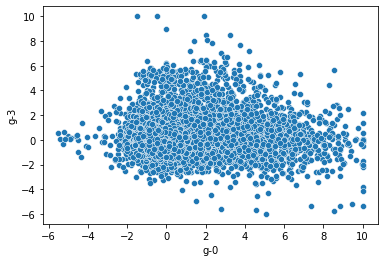

In [ ]:
#exemplo1 de scatterplot
sns.scatterplot(x='g-0', y = 'g-3', data=dados)

No exemplo acima de scatterplot (exemplo1) as variáveis `g-0` e `g-3` não parecem estar correlacionadas, pois não há um crescimento de ambas as variáveis (correlação positiva) e nem um decaimento de ambas (correlação negativa).

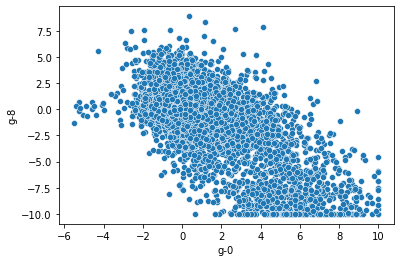

In [ ]:
#exemplo2 de scatterplot
sns.scatterplot(x='g-0', y = 'g-8', data=dados)

No exemplo acima de scatterplot(exemplo2) nota-se que de acordo com que o valor da variável `g-0` aumenta, o valor da variável `g-8` diminui, estando então correlacionadas negativamente. Mas isto é apenas uma hipótese.

Podemos confirmá-la verificando se a correlação entre as variáveis desenha de fato uma curva com inclinação negativa no gráfico.

Para isso, vamos desenhar no nosso gráfico de dispersão uma linha de tendência e, assim, poderemos confirmar o padrão daquele conjunto de dados.

Para a linha de tendência utilizamos a função `lmplot()` da biblioteca `seaborn`, [documentação](https://seaborn.pydata.org/generated/seaborn.lmplot.html)

`sns.lmplot(data=base de dados, x='variavel para o eixo x', y='variavel para o eixo y', line_kws={'color': 'cor da linha de tendencia'})`

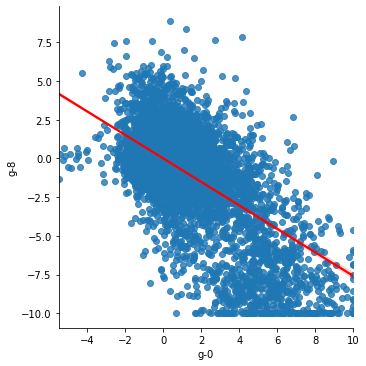

In [ ]:
#exemplo1 de lmplot
sns.lmplot(data=dados, x='g-0', y='g-8', line_kws={'color': 'red'})

Podemos ainda separar mais o nosso conjunto de dados, colocando filtros para a dosagem, o tratamento e o tempo (especialmente importante para drug discovery). Assim, fica mais fácil perceber as nuances de cada gráfico e o comportamento de determinado subconjunto.

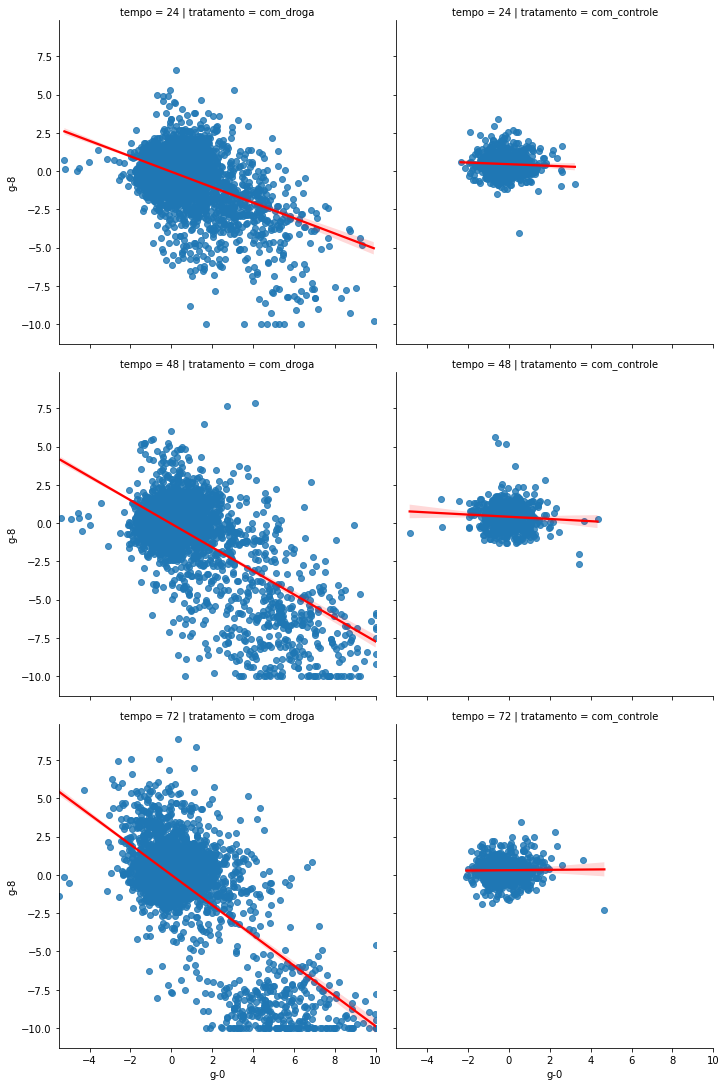

In [ ]:
#exemplo2 de lmplot
sns.lmplot(data=dados, x='g-0', y='g-8', line_kws={'color': 'red'}, col='tratamento', row='tempo')

No exemplo1 de lmplot confirmamos nossa hipótese, mas ainda há mais para se analisar. Podemos ainda calcular um coeficiente para esta correlação, normalmente utiliza-se o **coeficiente de correlação de Pearson**, ele determina a medida da direção e do grau com que as variáveis X e Y se associam linearmente em uma população.

Para calcular o coeficiente de correlação utilizamos a função `loc` da biblioteca `pandas`, agregada ao `.corr`. O loc serve para definirmos o intervalo em que a correlação vai ser calculada.

Como retorno da função, temos uma tabela que correlaciona a variável e apresenta o valor do coeficiente. O valor do coeficiente estará no intervalo (-1,1).  Do valor do coeficiente, observamos:

*   O coeficiente será positivo quando os dados apresentarem correlação linear positiva;
*   O coeficiente será negativo quando os dados apresentarem correlação linear negativa.



O valor pode ser não exato no intervalo aberto (-1, 1). Para estes casos, interpretamos estes valores como o **grau de dependência linear** entre as variáveis, podendo ser **fraca**, **moderada** e **forte**. Quanto mais próximo de 0, mais fraca a correlação entre as variáveis. Quando mais próximo de -1 ou +1, mais forte a correlação entre as variáveis. Aquela variável que possui a maior correlação é ideal para usar no modelo. Assim o coeficiente pode assumir:

* valor 1, onde os pontos no diagrama de dispersão estiverem exatamente sobre uma reta ascendente (uma correlação positiva perfeita);
* valor -1, onde os pontos no diagrama de dispersão estiverem exatamente sobre uma reta descendente (uma correlação negativa perfeita);
* valor 0 quando os dados não apresentarem correlação.

In [40]:
dados.loc[:,'g-0':'g-50'].corr()

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,g-40,g-41,g-42,g-43,g-44,g-45,g-46,g-47,g-48,g-49,g-50
g-0,1.000000,0.086032,0.176188,0.011266,0.403153,-0.165478,0.238348,-0.374451,-0.604212,-0.428779,-0.547606,0.219762,-0.199453,0.472223,-0.346179,-0.201323,-0.513026,-0.433536,-0.002073,-0.074622,-0.468599,0.052445,0.022269,-0.076298,-0.337522,-0.235191,-0.422814,0.148432,-0.471092,-0.296871,-0.528327,0.558136,-0.133229,-0.155987,-0.120247,0.327593,-0.147800,-0.591868,0.602623,0.450769,-0.432426,-0.499815,-0.203828,0.021582,-0.023423,-0.119687,0.530238,0.039827,0.238235,0.310583,-0.560201
g-1,0.086032,1.000000,-0.054518,-0.027855,0.193647,-0.151590,-0.122541,0.144537,-0.009973,-0.047558,-0.009051,0.161274,0.037178,-0.009256,0.002632,-0.070193,-0.063414,-0.000944,-0.023748,-0.034714,-0.131031,0.196596,-0.061441,0.090620,-0.004299,-0.032600,-0.019435,0.015661,-0.098907,-0.091071,-0.053331,-0.049514,0.187382,-0.091232,0.045417,0.044373,-0.077671,-0.005265,-0.042213,0.050546,0.000655,-0.110238,0.133896,0.161186,-0.092498,0.031993,0.097674,-0.012420,0.029064,-0.106349,-0.028870
g-2,0.176188,-0.054518,1.000000,0.042633,0.013968,0.018516,0.015190,-0.144205,-0.128029,-0.081332,-0.105050,0.011198,-0.063501,0.082011,-0.082204,-0.059607,-0.137811,-0.085491,0.053335,0.028813,-0.061160,-0.129131,-0.007426,-0.034230,-0.128312,-0.067363,-0.126554,0.036984,-0.129481,-0.017941,-0.152288,0.172191,-0.100086,-0.033010,-0.015481,0.001098,-0.020374,-0.157977,0.169464,0.144449,-0.080201,-0.109646,-0.121433,-0.086435,0.021241,-0.036105,0.142712,-0.009575,0.039119,0.052003,-0.140002
g-3,0.011266,-0.027855,0.042633,1.000000,-0.033039,0.042231,-0.043177,-0.175692,-0.086167,-0.014052,-0.074101,0.181024,0.030539,0.192727,0.128792,-0.045688,0.033974,-0.070920,0.237669,0.112392,0.027867,-0.167263,0.197013,-0.049480,-0.113336,0.175615,0.111355,0.007168,-0.022381,-0.128269,-0.042827,0.098416,-0.091962,-0.083806,0.184985,-0.070933,-0.317859,-0.228039,0.084346,0.054827,0.114685,-0.047136,-0.010941,-0.168398,-0.001770,0.065444,0.082046,0.297146,0.173796,0.072970,-0.233491
g-4,0.403153,0.193647,0.013968,-0.033039,1.000000,-0.057449,0.206405,-0.032748,-0.474828,-0.274167,-0.458021,0.116467,-0.207078,0.210440,-0.307280,0.019531,-0.275700,-0.422889,-0.012207,-0.088152,-0.311798,0.286106,-0.055368,-0.113396,-0.120743,-0.233682,-0.340708,0.070292,-0.360274,-0.225461,-0.402256,0.324362,0.091731,-0.052787,-0.073490,0.195062,-0.124394,-0.277002,0.285256,0.300517,-0.309149,-0.373390,0.071462,0.185361,-0.105936,-0.033695,0.355833,-0.060724,0.006138,0.114748,-0.315675
g-5,-0.165478,-0.151590,0.018516,0.042231,-0.057449,1.000000,0.083620,0.102345,0.073885,0.126561,0.038743,-0.171709,-0.000393,-0.112423,0.073760,0.037763,0.221227,0.033641,0.041073,0.134431,0.136226,0.042455,0.095901,-0.000709,0.120697,0.082212,0.058257,-0.106304,0.137596,0.171353,0.136856,-0.133521,0.025275,-0.070144,0.058305,-0.108843,-0.034259,0.142193,-0.189048,-0.097622,0.208673,0.206885,0.120727,-0.031065,-0.047988,0.090507,-0.176810,0.023328,0.039471,-0.127953,0.128877
g-6,0.238348,-0.122541,0.015190,-0.043177,0.206405,0.083620,1.000000,0.030544,-0.212292,-0.134739,-0.264575,-0.064363,-0.041731,0.110102,-0.126069,-0.107593,-0.109543,-0.182960,-0.058387,0.070343,0.049195,0.244205,-0.076039,-0.063008,0.034160,-0.002408,-0.194962,-0.051850,-0.032510,0.091318,-0.113642,0.179365,0.065968,-0.059884,-0.114453,0.102340,0.106371,-0.038967,0.045983,0.073990,-0.040374,-0.006081,-0.170005,0.137326,0.053565,-0.003568,0.094446,-0.045317,-0.074863,0.104435,0.026171
g-7,-0.374451,0.144537,-0.144205,-0.175692,-0.032748,0.102345,0.030544,1.000000,0.278085,0.288780,0.382325,-0.184966,0.166101,-0.380687,0.266334,0.141999,0.372104,0.185269,-0.061020,0.121534,0.231938,0.321506,-0.043685,0.143473,0.458273,0.123891,0.262002,-0.126174,0.287440,0.222967,0.419395,-0.453566,0.492635,-0.036

Utilizamos, como auxílio visual, um mapa de calor para que possamos identificar com maior facilidade a correlação entre as variáveis.

Esse código já está construído na própria documentação do Seaborn, vamos copiar o [código](https://seaborn.pydata.org/examples/many_pairwise_correlations.html) de lá, fazendo algumas pequenas alterações.

Adicionalmente, também fizemos a importação da biblioteca Numpy que é usada para gerar este mapa de calor (import numpy as np).

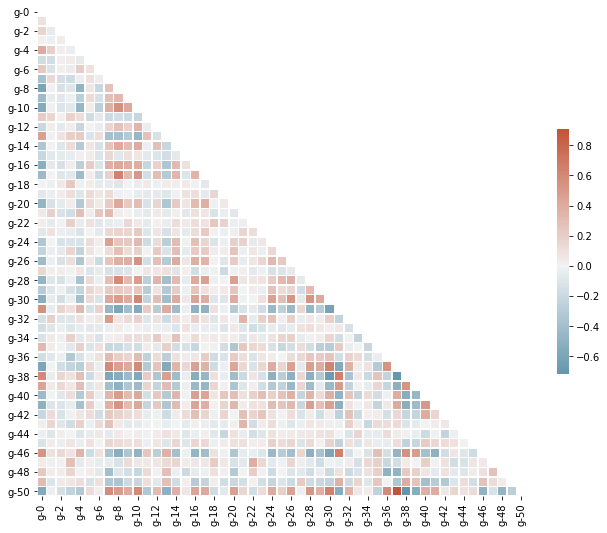

In [39]:
#exemplo1 de correlação: correlação entre os genes g-0 à g-50
corr = dados.loc[:,'g-0':'g-50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

In [ ]:
#exemplo2 de correlação: correlação entre a viabilidade celular c-0 à c-50
corr_celular = dados.loc[:,'c-0':'c-50'].corr()

# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_celular, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_celular, mask=mask, cmap=cmap, center=0,
            square=True, linewidths=.5, cbar_kws={"shrink": .5})

A escala deste novo gráfico é bem diferente da escala anterior, temos valores apenas entre 0,65 e 0,90, correlações altamente proporcionais.

# **Desafio 5**
Calcular e analisar a correlação entre G e C. Refletir sobre os efeitos biológicos.

Primeiro separamos os dados pelo tipo de tratamento, fazemos a filtragem do dataset para pegar apenas as análises feitas com drogas utilizando `query()`, para podermos entender qual a influência das drogas utilizadas no ensaio realizado. Armazenamos na nova variável `analise_com_droga`.

In [66]:
analise_com_droga = dados.query('tratamento == "com_droga"')
genes = analise_com_droga.loc[:,'g-0':'g-49']
celulas = analise_com_droga.loc[:,'c-0':'c-49']
#podemos fazer tudo junto tbm da seguinte forma, sem precisar usar query() criando a nova variavel:
genes = dados[dados['tratamento'] == 'com_droga'].loc[:,'g-0':'g-49']
celulas = dados[dados['tratamento'] == 'com_droga'].loc[:,'c-0':'c-49']

Vamos agora juntar ambos os dataframes criados, genes e células

In [68]:
tabela = pd.concat([genes,celulas],axis=1) #axis = 1 para juntar por coluna
tabela

,g-0,g-1,g-2,g-3,g-4,g-5,g-6,g-7,g-8,g-9,g-10,g-11,g-12,g-13,g-14,g-15,g-16,g-17,g-18,g-19,g-20,g-21,g-22,g-23,g-24,g-25,g-26,g-27,g-28,g-29,g-30,g-31,g-32,g-33,g-34,g-35,g-36,g-37,g-38,g-39,...,c-10,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29,c-30,c-31,c-32,c-33,c-34,c-35,c-36,c-37,c-38,c-39,c-40,c-41,c-42,c-43,c-44,c-45,c-46,c-47,c-48,c-49
0,1.0620,0.5577,-0.2479,-0.6208,-0.1944,-1.0120,-1.0220,-0.0326,0.5548,-0.0921,1.1830,0.1530,0.5574,-0.4015,0.1789,-0.6528,-0.7969,0.6342,0.1778,-0.3694,-0.5688,-1.1360,-1.1880,0.6940,0.4393,0.2664,0.1907,0.1628,-0.2853,0.5819,0.2934,-0.5584,-0.0916,-0.3010,-0.1537,0.2198,0.2965,-0.5055,-0.5119,-0.2162,...,0.9084,0.6857,1.0620,0.7602,-0.1048,0.3594,0.6376,-0.2798,-0.4010,0.6842,1.1560,0.3522,-0.3971,-0.2115,-0.2687,0.5196,0.1594,0.8920,0.6485,0.6078,0.3799,-0.1727,0.3817,0.3600,0.5124,-0.1414,0.6159,0.4689,-0.0773,0.4728,-0.0143,-0.5344,0.3578,0.3248,0.8903,0.3431,1.0340,1.3070,-1.0230,0.7709
1,0.0743,0.4087,0.2991,0.0604,1.0190,0.5207,0.2341,0.3372,-0.4047,0.8507,-1.1520,-0.4201,-0.0958,0.4590,0.0803,0.2250,0.5293,0.2839,-0.3494,0.2883,0.9449,-0.1646,-0.2657,-0.3372,0.3135,-0.4316,0.4773,0.2075,-0.4216,-0.1161,-0.0499,-0.2627,0.9959,-0.2483,0.2655,-0.2102,0.1656,0.5300,-0.2568,-0.0455,...,0.7787,0.2074,1.1110,0.2433,0.2010,0.7094,-0.4210,-0.2274,0.4045,0.1138,0.9950,0.0087,0.4864,-0.0140,0.0164,0.1759,0.6654,0.3556,0.8175,0.0474,0.5589,0.4481,0.1888,0.3712,0.7837,0.6860,0.4123,0.1560,-0.1203,-1.2780,0.6743,0.7358,0.1334,-0.5193,0.2281,0.0158,-0.5658,0.6065,0.6259,0.4716
2,0.6280,0.5817,1.5540,-0.0764,-0.0323,1.2390,0.1715,0.2155,0.0065,1.2300,-0.4797,-0.5631,-0.0366,-1.8300,0.6057,-0.3278,0.6042,-0.3075,-0.1147,-0.0570,-0.0799,-0.8181,-1.5320,0.2307,0.4901,0.4780,-1.3970,4.6240,-0.0437,1.2870,-1.8530,0.6069,0.4290,0.1783,0.0018,-1.1800,0.1256,-0.1219,5.4470,1.0310,...,0.3084,-0.0899,-0.0397,-0.5077,-0.5072,0.0100,-0.6915,0.0643,-0.8927,-0.2048,0.0773,0.5971,-0.1602,-0.2028,-0.2216,-1.1380,0.3668,-1.0620,-0.7736,0.6225,0.6274,-0.3038,0.1171,-0.0550,-0.0289,1.1740,-0.7937,-1.0610,-0.6409,0.3884,-1.0330,-0.0055,0.1212,-0.7020,-0.7065,-0.5192,-0.3181,0.1787,0.3354,0.1349
3,-0.5138,-0.2491,-0.2656,0.5288,4.0620,-0.8095,-1.9590,0.1792,-0.1321,-1.0600,-0.8269,-0.3584,-0.8511,-0.5844,-2.5690,0.8183,-0.0532,-0.8554,0.1160,-2.3520,2.1200,-1.1580,-0.7191,-0.8004,-1.4670,-0.0107,-0.8995,0.2406,-0.2479,-1.0890,-0.7575,0.0881,-2.7370,0.8745,0.5787,-1.6740,-1.6720,-1.2690,3.0900,-0.3814,...,-2.2730,-4.6920,-1.2750,-1.4970,-0.0156,-1.9350,-1.3430,-0.5252,-2.7210,-0.2524,0.9197,-3.1220,-1.9180,-0.6761,-2.8360,-1.6890,-4.4990,-1.5190,-2.2730,-0.3250,0.1895,-2.4220,0.0670,-1.9870,-0.6482,-0.0023,-1.9930,-0.8042,-3.6160,-0.3487,-1.2560,-2.7220,-2.1970,-2.9030,-1.1030,-2.3020,-2.0030,-1.3390,-3.0160,-3.0040
4,-0.3254,-0.4009,0.9700,0.6919,1.4180,-0.8244,-0.2800,-0.1498,-0.8789,0.8630,-0.2219,-0.5121,-0.9577,1.1750,0.2042,0.1970,0.1244,-1.7090,-0.3543,-0.5160,-0.3330,-0.2685,0.7649,0.2057,1.3720,0.6835,0.8056,-0.3754,-1.2090,0.2965,-0.0712,0.6389,0.6674,-0.0783,1.1740,-0.7110,-1.4470,1.0620,0.7888,-0.0848,...,0.9642,-0.0853,0.1559,0.1419,0.1197,0.6774,0.1332,-0.5176,0.1232,0.0827,0.6995,0.5953,1.0600,-0.4255,0.8624,1.0010,0.0840,-0.6553,-0.1093,0.0587,0.5490,0.6331,0.5227,0.2186,0.2781,0.8947,-0.0202,0.5966,0.2249,0.5671,0.6382,-0.3909,0.7040,0.1462,0.0655,-0.5605,0.5903,-0.2353,-0.1285,-0.1740
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
23808,0.1608,-1.0500,0.2551,-0.2239,-0.2431,0.4256,-0.1166,-0.1777,-0.7480,0.1368,0.5493,-0.5083,0.4112,0.1181,0.7861,-0.1877,0.2476,0.1956,0.0273,0.1182,-0.5037,-0.5939,0.4825,-0.5187,0.1618,-0.2253,0.3153,0.4839,0.0520,1.3850,0.6502,-0.4198,0.272

Criamos primeiro a tabela de correlação:


In [72]:
#corr = tabela.corr()
#diminuindo as casas decimais:
#corr = tabela.corr().round(3) #vamos filtrar para ter a relação somente entre as células com os genes
corr_filtrada = corr.loc[:'g-49','c-0':] #genes nas linhas, células nas colunas, fazemos até g-49 pois as células só vão até 49
corr_filtrada

,c-0,c-1,c-2,c-3,c-4,c-5,c-6,c-7,c-8,c-9,c-10,c-11,c-12,c-13,c-14,c-15,c-16,c-17,c-18,c-19,c-20,c-21,c-22,c-23,c-24,c-25,c-26,c-27,c-28,c-29,c-30,c-31,c-32,c-33,c-34,c-35,c-36,c-37,c-38,c-39,c-40,c-41,c-42,c-43,c-44,c-45,c-46,c-47,c-48,c-49
g-0,-0.632,-0.634,-0.648,-0.614,-0.613,-0.638,-0.677,-0.616,-0.650,-0.641,-0.631,-0.639,-0.638,-0.649,-0.632,-0.655,-0.648,-0.686,-0.603,-0.652,-0.693,-0.638,-0.551,-0.589,-0.668,-0.613,-0.627,-0.670,-0.656,-0.623,-0.662,-0.668,-0.654,-0.663,-0.658,-0.649,-0.614,-0.574,-0.636,-0.654,-0.625,-0.654,-0.662,-0.627,-0.663,-0.660,-0.610,-0.661,-0.604,-0.618
g-1,-0.032,-0.023,-0.031,0.019,-0.019,0.004,-0.020,0.009,-0.008,0.020,-0.000,-0.019,-0.009,-0.026,-0.009,0.012,-0.013,-0.017,0.005,0.006,-0.001,-0.005,0.064,0.025,-0.005,0.030,-0.011,-0.012,-0.019,-0.007,0.002,-0.028,-0.012,-0.005,0.018,0.001,-0.024,-0.030,-0.018,0.009,-0.025,-0.003,0.016,-0.020,-0.004,-0.001,-0.007,0.009,0.004,0.035
g-2,-0.172,-0.184,-0.181,-0.161,-0.184,-0.174,-0.184,-0.180,-0.182,-0.167,-0.184,-0.180,-0.185,-0.187,-0.179,-0.186,-0.166,-0.182,-0.172,-0.175,-0.187,-0.176,-0.140,-0.196,-0.174,-0.175,-0.184,-0.188,-0.166,-0.169,-0.182,-0.190,-0.188,-0.192,-0.179,-0.193,-0.164,-0.164,-0.185,-0.188,-0.183,-0.179,-0.197,-0.170,-0.191,-0.182,-0.170,-0.177,-0.163,-0.172
g-3,-0.040,-0.098,-0.091,-0.032,-0.072,-0.058,-0.126,-0.034,-0.065,-0.104,-0.063,-0.077,-0.085,-0.085,-0.076,-0.045,-0.061,-0.092,-0.070,-0.028,-0.075,-0.075,0.071,-0.005,-0.064,-0.009,-0.117,-0.073,-0.091,-0.041,-0.061,-0.103,-0.045,-0.098,-0.047,-0.051,-0.082,-0.036,-0.107,-0.031,-0.090,-0.050,-0.071,-0.073,-0.067,-0.078,-0.035,-0.073,-0.062,-0.037
g-4,-0.418,-0.391,-0.404,-0.371,-0.374,-0.398,-0.376,-0.390,-0.396,-0.358,-0.389,-0.396,-0.392,-0.398,-0.409,-0.393,-0.402,-0.401,-0.351,-0.408,-0.419,-0.390,-0.330,-0.365,-0.405,-0.384,-0.365,-0.418,-0.394,-0.394,-0.387,-0.403,-0.429,-0.378,-0.405,-0.395,-0.395,-0.372,-0.375,-0.401,-0.393,-0.399,-0.371,-0.405,-0.399,-0.403,-0.369,-0.406,-0.361,-0.363
g-5,0.215,0.205,0.218,0.201,0.213,0.210,0.198,0.179,0.210,0.167,0.192,0.214,0.188,0.220,0.191,0.197,0.192,0.190,0.191,0.213,0.184,0.209,0.193,0.185,0.210,0.206,0.195,0.208,0.199,0.206,0.186,0.204,0.199,0.174,0.192,0.203,0.217,0.204,0.193,0.203,0.209,0.210,0.201,0.223,0.190,0.187,0.205,0.195,0.200,0.200
g-6,-0.118,-0.096,-0.095,-0.105,-0.069,-0.096,-0.092,-0.114,-0.093,-0.090,-0.091,-0.084,-0.096,-0.063,-0.115,-0.108,-0.139,-0.105,-0.054,-0.124,-0.133,-0.085,-0.112,-0.111,-0.099,-0.083,-0.063,-0.109,-0.088,-0.128,-0.110,-0.101,-0.137,-0.091,-0.124,-0.126,-0.089,-0.107,-0.068,-0.112,-0.088,-0.110,-0.095,-0.092,-0.100,-0.100,-0.096,-0.099,-0.066,-0.101
g-7,0.506,0.576,0.587,0.541,0.586,0.560,0.611,0.511,0.587,0.604,0.576,0.589,0.608,0.594,0.530,0.581,0.517,0.600,0.588,0.518,0.578,0.582,0.475,0.514,0.590,0.532,0.610,0.573,0.592,0.504,0.556,0.598,0.532,0.606,0.578,0.562,0.564,0.481,0.625,0.550,0.576,0.547,0.613,0.541,0.579,0.603,0.547,0.589,0.583,0.553
g-8,0.627,0.607,0.602,0.571,0.548,0.597,0.611,0.586,0.604,0.563,0.593,0.580,0.590,0.580,0.627,0.573,0.607,0.619,0.528,0.612,0.641,0.554,0.489,0.568,0.602,0.567,0.540,0.611,0.595,0.603,0.620,0.630,0.641,0.605,0.616,0.615,0.553,0.540,0.555,0.602,0.600,0.634,0.590,0.585,0.600,0.595,0.554,0.599,0.519,0.568
g-9,0.447,0.487,0.500,0.465,0.497,0.472,0.501,0.447,0.487,0.471,0.476,0.501,0.508,0.501,0.461,0.497,0.454,0.500,0.489,0.465,0.485,0.491,0.406,0.462,0.492,0.465,0.491,0.491,0.493,0.461,0.472,0.497,0.477,0.499,0.477,0.480,0.479,0.436,0.507,0.481,0.492,0.474,0.501,0.481,0.492,0.492,0.458,0.490,0.476,0.470


Vamos criar agora uma heat map:

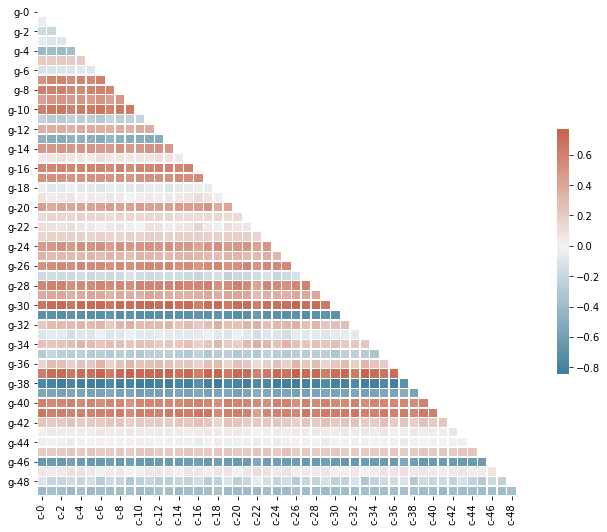

In [75]:
# Generate a mask for the upper triangle
mask = np.triu(np.ones_like(corr_filtrada, dtype=bool))

# Set up the matplotlib figure
f, ax = plt.subplots(figsize=(11, 9))

# Generate a custom diverging colormap
cmap = sns.diverging_palette(230, 20, as_cmap=True)

# Draw the heatmap with the mask and correct aspect ratio
sns.heatmap(corr_filtrada, mask=mask, cmap=cmap, center=0, square=True, linewidths=.5, cbar_kws={"shrink": .5})

Do heat map podemos notar que há genes que possuem uma correlação positiva forte com algumas células, outros possuem uma correlação negativa forte com algumas células e outros já não possuem nenhuma correlação com algumas células.

A olho nú podemos ver os seguintes exemplos:
* Os genes g-41, g-40, g-37, g-30 e outros possuem correlação positiva forte com todas as células, ou seja, uma alta expressão do gene está correlacionada com uma alta viabilidade celular;
* Os genes g-46, g-38, g-13 e outros possuem uma correlação negativa forte com todas as células, ou seja, uma baixa expressão do gene está correlacionada com uma alta viabilidade celular (ou o contrário - uma alta expressão do gene está correlacionada com uma baixa viabilidade celular, enquanto um valor aumenta o outro diminui).
* Os genes g-44, g-31, g-18 possuem quase nenhuma ou nenhuma correlação com a viabilidade celular.

Não podemos dizer, pela nossa análise até o momento, que há uma relação de causalidade entre os genes e as células, mas com certeza há uma correlação.

Por meio desta análise podemos fazer uma filtragem nos genes e focar apenas naqueles que possuem uma correlação forte (positiva ou negativa) com a viabilidade celular para aprofundar nossos estudos.

# **Desafio 7**
Na aula 3 da Imersão Dados estudamos sobre Correlação Linear. Vimos como fazer análises para identificar variáveis correlacionadas e não correlacionas e determinar o grau e direção da correlação, quando existe.

Criamos tabelas de frequência com as funções crosstab, pivot_table e groupby.

Plotamos gráficos de dispersão, colocando uma reta de tendência para identificar mais facilmente o grau e direção da correlação. Plotamos mapas de calor (heat map).

Nessa situação identificamos que temos genes que influenciam positivamente ou negativamente na viabilidade celular.